In [20]:
import os, sys
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

HOME = os.getenv("HOME")
DATA_DIR = HOME + '/data/mnist/'



In [25]:
#One way to show an image
r = np.random.rand(28, 28, 3)
img = Image.fromarray(r, 'RGB')
img.show()

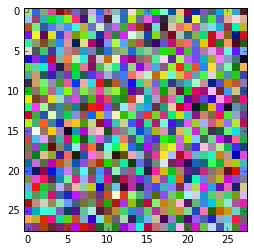

In [26]:
#another way
plt.imshow(r, interpolation='nearest')
plt.show()

# Data Prep and Exploration

In [66]:
train = pd.read_csv(DATA_DIR + 'train.csv')

In [124]:
from keras.utils.np_utils import to_categorical

split_ind = int(0.8 * train.shape[0])
X = train.iloc[:, 1:].values / 255.0
X_reshape = np.reshape(X, (X.shape[0], 28, 28, 1))
X_train = X_reshape[:split_ind, :]
X_val = X_reshape[split_ind:, :] 
Y_train = train.iloc[:split_ind, 0].values
Y_val = train.iloc[split_ind:, 0].values
y_train_ohe = to_categorical(Y_train)
y_val_ohe = to_categorical(Y_val)

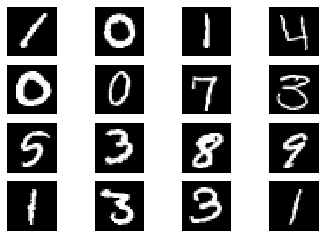

In [151]:
#plot the first few number images
s = 16
X_plot = np.reshape(X, (X.shape[0], 28, 28))
fig = plt.figure()
for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(X_plot[i] * 255.0, interpolation='nearest', cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

# Build the network

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

## Simple Conv2 Network

In [139]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode = 'same', 
                        input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2), strides = None))
model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

In [140]:
model.fit(X_train[:2000, :], y_train_ohe[:2000], batch_size = 32, nb_epoch = 5,
         validation_data = (X_val[2000:3000, :], y_val_ohe[2000:3000]))

Train on 2000 samples, validate on 1000 samples
Epoch 1/5
2000/2000 [==============================] - 1s - loss: 1.1162 - acc: 0.7040 - val_loss: 0.5227 - val_acc: 0.8140
Epoch 2/5
2000/2000 [==============================] - 1s - loss: 0.4151 - acc: 0.8760 - val_loss: 0.3752 - val_acc: 0.8790
Epoch 3/5
2000/2000 [==============================] - 1s - loss: 0.3153 - acc: 0.9055 - val_loss: 0.3392 - val_acc: 0.8890
Epoch 4/5
2000/2000 [==============================] - 1s - loss: 0.2544 - acc: 0.9255 - val_loss: 0.3083 - val_acc: 0.9020
Epoch 5/5
2000/2000 [==============================] - 1s - loss: 0.2220 - acc: 0.9395 - val_loss: 0.2902 - val_acc: 0.9120


## Purely Dense network

In [141]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim = 784))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax', W_regularizer = 'l2'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

In [142]:
model.fit(X[:2000, :], y_train_ohe[:2000], batch_size = 32, nb_epoch = 20,
         validation_data = (X[2000:3000, :], y_val_ohe[2000:3000]))

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 0s - loss: 1.6387 - acc: 0.5800 - val_loss: 3.9232 - val_acc: 0.0910
Epoch 2/20
2000/2000 [==============================] - 0s - loss: 0.7175 - acc: 0.8555 - val_loss: 5.3672 - val_acc: 0.0920
Epoch 3/20
2000/2000 [==============================] - 0s - loss: 0.5305 - acc: 0.9025 - val_loss: 6.1482 - val_acc: 0.0930
Epoch 4/20
2000/2000 [==============================] - 0s - loss: 0.4550 - acc: 0.9205 - val_loss: 6.5739 - val_acc: 0.0960
Epoch 5/20
2000/2000 [==============================] - 0s - loss: 0.3874 - acc: 0.9350 - val_loss: 6.9852 - val_acc: 0.0940
Epoch 6/20
2000/2000 [==============================] - 0s - loss: 0.3480 - acc: 0.9395 - val_loss: 7.3057 - val_acc: 0.0920
Epoch 7/20
2000/2000 [==============================] - 0s - loss: 0.3057 - acc: 0.9560 - val_loss: 7.6100 - val_acc: 0.0930
Epoch 8/20
2000/2000 [==============================] - 0s - loss: 0.2827 - a

## RF

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X[:split_ind, :], y_train_ohe)
preds = rf.predict(X[split_ind:])
accuracy_score(y_val_ohe, preds)

## Better Conv Network

In [162]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode = 'same', 
                        input_shape = (28, 28, 1), activation = 'relu'))

model.add(Convolution2D(64, 3, 3, border_mode = 'same', 
                        input_shape = (28, 28, 1), activation = 'relu'))

model.add(Convolution2D(128, 3, 3, border_mode = 'same', 
                        input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2), strides = None))
model.add(Dropout(0.5))
model.add(Flatten())


#model.add(Dense(50, activation='softmax'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

In [163]:
model.fit(X_train[:2000, :], y_train_ohe[:2000], batch_size = 32, nb_epoch = 5,
         validation_data = (X_val[2000:3000, :], y_val_ohe[2000:3000]))

Train on 2000 samples, validate on 1000 samples
Epoch 1/5
2000/2000 [==============================] - 24s - loss: 0.7839 - acc: 0.7415 - val_loss: 0.2938 - val_acc: 0.8890
Epoch 2/5
2000/2000 [==============================] - 24s - loss: 0.2044 - acc: 0.9375 - val_loss: 0.2022 - val_acc: 0.9360
Epoch 3/5
2000/2000 [==============================] - 24s - loss: 0.1321 - acc: 0.9605 - val_loss: 0.1661 - val_acc: 0.9470
Epoch 4/5
2000/2000 [==============================] - 24s - loss: 0.0608 - acc: 0.9800 - val_loss: 0.1207 - val_acc: 0.9630
Epoch 5/5
2000/2000 [==============================] - 24s - loss: 0.0392 - acc: 0.9890 - val_loss: 0.1712 - val_acc: 0.9610
